In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# View all of the classes that automap found
 # Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [23]:
first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b775fb9430>,
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01'}

In [88]:
first_row_station = session.query(station).first()
first_row_station.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b7793fef70>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [60]:
from datetime import datetime, timedelta


datetime.datetime(2016, 8, 23, 0, 0)

C:\Users\jeann\AppData\Local\Temp/ipykernel_47764/1085541882.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  df.sort_index(0)


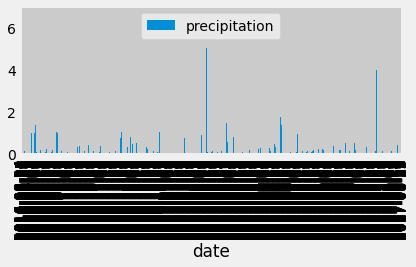

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date).first()
start_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
start_date =  datetime.strptime(start_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
end_date = start_date - timedelta(days = 365)
end_date

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > end_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_index(0)

# Use Pandas Plotting with Matplotlib to plot the data

df.plot.bar()
plt.tight_layout()
plt.show()



In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.groupby("date").sum()

,precipitation
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(measurement.station)) .\
    group_by(measurement.station)



In [87]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import asc, desc

stations = session.query(measurement.station, func.count(measurement.station)) .\
    group_by(measurement.station) .\
    order_by(desc(func.count(measurement.station))).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)).\
    filter(measurement.station=='USC00519281').\
        group_by(measurement.station)
active_station

AttributeError: 'Rectangle' object has no property 'column'

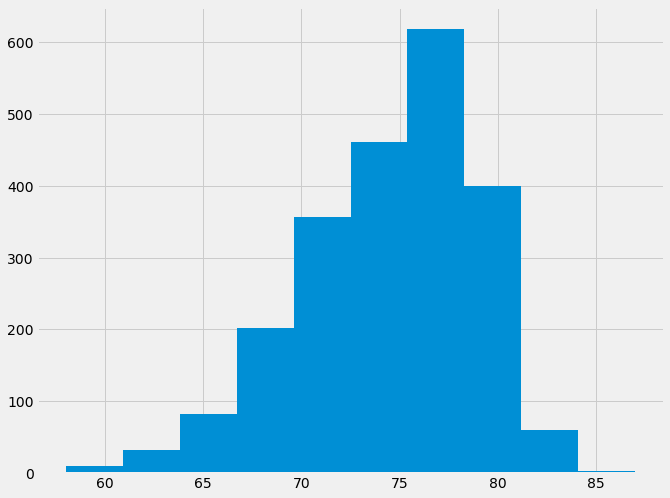

In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram# Starting from the most recent data point in the database. 
session.query(measurement.date).filter(station=='USC00519281').order_by(measurement.date).first()
start_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
start_date =  datetime.strptime(start_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
end_date = start_date - timedelta(days = 365)
end_date

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date > end_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip, columns=['date', 'temperature'])
df.set_index('date', inplace=True)
df

ax = df.plot.hist(column=["temperture"], by="date", figsize=(10, 8))

# Close session

In [97]:
# Close Session
session.close()